In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
from tqdm import tqdm

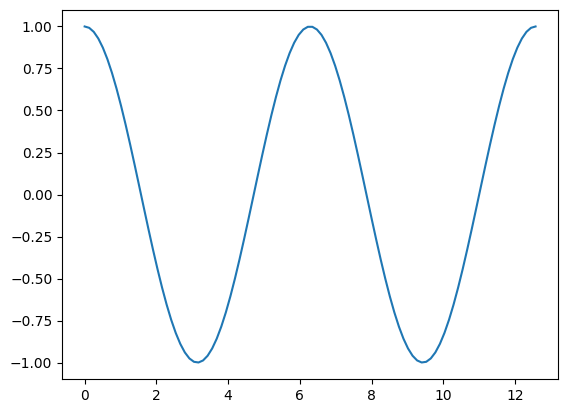

In [177]:
xs = torch.linspace(0, 4*np.pi, 100)
ys = torch.cos(xs)
x_train = xs.unsqueeze_(1).float()
y_train = ys.unsqueeze_(1).float()
plt.plot(xs, ys)

In [238]:
class cos_model(nn.Module):
    def __init__(self,xs):
        super(cos_model, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(),
            nn.Linear(50,200),
            nn.ReLU(),
            nn.Linear(200,50),
            nn.ReLU(),
            nn.Linear(50,1)
        )

    def forward(self, xs):
        return self.net(xs)

In [253]:
model = cos_model(xs)
optimizer = optim.Adam(model.parameters())
objective = nn.MSELoss()
epochs = 300

for epoch in tqdm(range(epochs)):
    optimizer.zero_grad()

    y_hat = model(xs)
    loss = objective(ys, y_hat)

    loss.backward()
    optimizer.step()

x_test = (torch.linspace(0,4*np.pi,200)).unsqueeze(1).float()

with torch.no_grad():
    model.eval()
    ys_pred = model(x_test).detach()

100%|██████████| 300/300 [00:00<00:00, 710.77it/s]


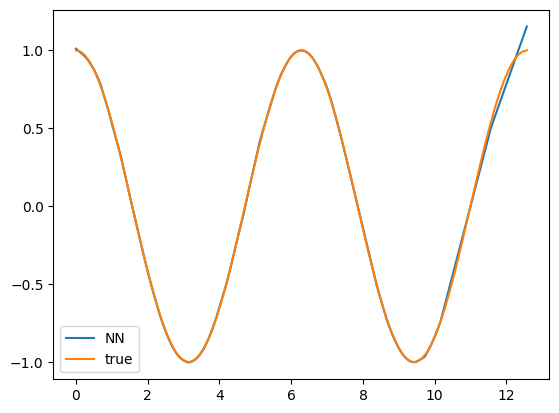

In [254]:
plt.plot(x_test,ys_pred,label="NN")
plt.plot(xs,ys,label="true")
plt.legend()

In [176]:
print(model)

cos_model(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=150, bias=True)
    (3): ReLU()
    (4): Linear(in_features=150, out_features=50, bias=True)
    (5): ReLU()
    (6): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [261]:
for param in model.parameters():
  print(param.data.size())

torch.Size([50, 1])
torch.Size([50])
torch.Size([200, 50])
torch.Size([200])
torch.Size([500, 200])
torch.Size([500])
torch.Size([200, 500])
torch.Size([200])
torch.Size([50, 200])
torch.Size([50])
torch.Size([1, 50])
torch.Size([1])


In [262]:
for param in model.parameters():
  print(param.data)

tensor([[ 0.2831],
        [-0.1898],
        [ 0.0594],
        [-0.6245],
        [-0.8886],
        [ 0.5431],
        [-0.5633],
        [-0.0049],
        [-0.1167],
        [-0.6608],
        [-0.4316],
        [-0.1237],
        [ 0.1889],
        [-0.7319],
        [ 0.0463],
        [-0.2384],
        [ 0.3965],
        [-0.7415],
        [-0.1886],
        [-0.8948],
        [-0.7181],
        [-0.5350],
        [ 0.0526],
        [ 0.0047],
        [ 0.4869],
        [ 0.5994],
        [-0.9159],
        [ 0.1065],
        [ 0.2526],
        [ 0.6780],
        [-0.8378],
        [ 0.3413],
        [ 0.2235],
        [-0.0023],
        [-0.1995],
        [ 0.6495],
        [-0.9259],
        [ 0.2462],
        [-0.8256],
        [ 0.4705],
        [ 0.2683],
        [-0.1081],
        [-0.3896],
        [-0.0059],
        [ 0.2099],
        [-0.5642],
        [ 0.2003],
        [-0.9361],
        [ 0.1807],
        [-0.3715]])
tensor([-0.8883,  0.5115, -0.0375, -0.8832, -0.77